In [6]:
#import map_equ
from closest import closest
import matplotlib.pylab as plt
import numpy as np
from readVessel import readVessel
import sys
import os
from tinylib import eqildatah5py
from ipfnpytools.rhosep2 import rhosep2
plt.style.use('helvet2dark')

In [2]:
arr = readVessel('./Support_Files/vessel.txt')
eqh = eqildatah5py('./Equilibrium/EQH34875.h5')

In [30]:
# %time
# eq = map_equ.equ_map()
# eq.Open(shotnr, 'EQH')
# eq._read_pfm()
# eq.pfm.shape
# eq.Rmesh.shape
# eq.Zmesh.shape
# eq.t_eq.shape
# eq.getQuantity(0.5, 'Qpsi') # read something to populate psi0, psix
# eq.psi0
# eq.psix

/home/guimas/anaconda3/envs/toki/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


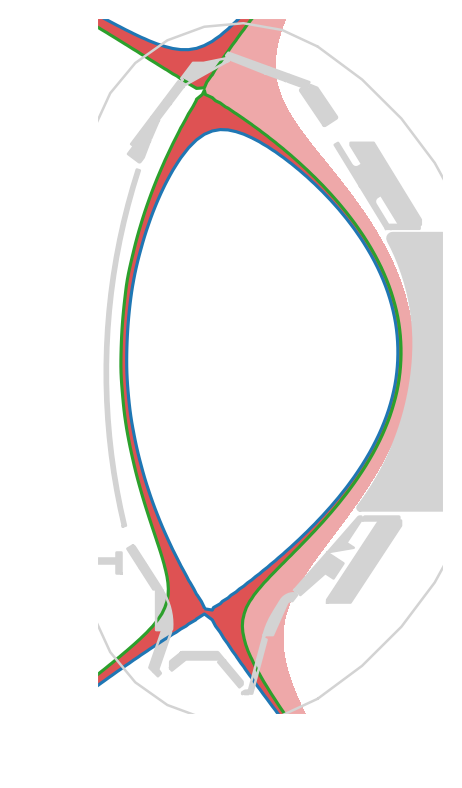

In [18]:
plt.clf()

#Time index
shotnr = 34875
time = 3.0
index = closest(eqh.t, time)

#Values of rho poloidal to plot
contourlevels = [1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09]
#contourlevels = [1.0, 1.036, 1.1]

plt.figure(figsize=(3.0, 5.5), dpi=150)

rho = np.sqrt((eqh.pfm[:,:,:] - eqh.psi0)/(eqh.psix-eqh.psi0))[:,:,index].T

r2 = rhosep2(eqh.shotnr, [time,time])
rsep2 = r2[0]

##plt.contourf(eqh.R, eqh.Z, np.sqrt((eqh.pfm[:,:,:] - eqh.psi0)/(eqh.psix-eqh.psi0))[:,:,index].T,[1.036, 1.1], colors='C0', alpha=0.5)

#Mask the interest region
Rlmsk = eqh.R>1.4
#Rlmsk = eqh.R>1.0

plt.contourf(eqh.R, eqh.Z, rho, [1.0, rsep2], colors='C3', alpha=0.8)
plt.contourf(eqh.R[Rlmsk], eqh.Z, rho[:,Rlmsk], levels=[rsep2, 1.1], colors='C3', alpha=0.4)

plt.contour(eqh.R, eqh.Z, rho, levels=[1.0], colors='C0')
plt.contour(eqh.R, eqh.Z, rho, levels=[rsep2], colors='C2',lw=0.1)
#plt.contour(eqh.R[Rlmsk], eqh.Z, rho[:,Rlmsk], levels=[1.1], colors='C0')
plt.grid(b='off')

# try:
#     arr = readVessel('./vessels/vessel_' + str(shotnr) + '.txt')
# except:
#     print "Getting vessel!"
#     stringcmd = "python getVessel.py " + str(shotnr) + " > ./vessels/vessel_" + str(shotnr) + ".txt"
#     os.system(stringcmd)
#     arr = readVessel('./vessels/vessel_' + str(shotnr) + '.txt')

##Fill, then plot
for entry in arr:
    r = entry[:,0]
    z = entry[:,1]
    #Check if it's the cessel outline
    if ((min(r)<1.1) & (max(r)>2.0) & (min(z)<1) & (max(z)>1)):
        a=0 #Do nothing
    else:
        plt.fill(entry[:,0], entry[:,1], color='#D3D3D3')

for entry in arr:
    plt.plot(entry[:,0], entry[:,1], color='#D3D3D3', lw=1.2)
    #plt.plot(entry[:,0], entry[:,1], color='k', lw=1.2)
    
    
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("R [m]")
plt.ylabel("Z [m]")
plt.xlim([1.0, 2.32])
plt.ylim([-1.3, 1.35])

#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 3
#fig_size[1] = 6.5
#plt.rcParams["figure.figsize"] = fig_size

fname = "./Figures/mag" + str(shotnr) + "_" + str(time) + ".png"

plt.tight_layout()
plt.savefig(fname, dpi=300, transparent=True)
plt.show()

In [42]:
np.shape(rho)

(129, 65)

In [44]:
np.shape(eqh.R)

(65,)

In [15]:
pwd

u'/home/guimas/Documents/Work/Shoulder'